# Finishing up: Visualizing Datatypes - Tabular data with Pandas
1. Tabular data
   1. with Pandas (https://pandas.pydata.org/)
   1. ~~with NumPy (https://numpy.org/) (probably not time though... maybe next time?)~~

### and 

# Colormaps


**NOTE:** we will probably not cover all of the material listed here, but its included as extra materials for fun!


**Make sure you go over how to access the notebook in near-real time!**

Let's start this notebook by importing our usual things:

In [1]:
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams["font.family"] = "sans-serif" # note, could also use like "sans-serif" others, just google

# lets also import numpy
import numpy as np

# 1. Tabular Data with Pandas

Let's also try making some histograms from tabular data, in this case a CSV file.

Make sure you have the building inventory downloaded from the class website! https://uiuc-ischool-dataviz.github.io/is445_AOUAOG_fall2021/week02/data/building_inventory.csv

You can also learn more about this dataset on its original site: https://data.illinois.gov/dataset/87building_inventory

We can also do a lot of these things with the `pandas` library.

(This is something you can pip or anaconda install if you need to.)

We'll import pandas with the "pd" shorthand to make our lives easier:

In [2]:
import pandas as pd

In [3]:
# You can download a CSV file and read from where you've downloaded:
#buildings = pd.read_csv('/Users/jnaiman/Downloads/building_inventory.csv')

Note: you can read directly from the web: 

In [4]:
buildings = pd.read_csv('https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/building_inventory.csv')

We can take a quick look at our pandas `dataframe` object "in line":

In [5]:
buildings
# formatting here is sort of nice

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,1987,130,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971,1971,49552,1,1,0,Education,Education,Not provided


Pandas comes with a lot of nice built in functions like for example, we can easily count how many entries there are in this dataset:

In [6]:
# how many entries are there? as an iterable
buildings.index

RangeIndex(start=0, stop=8862, step=1)

We can print out slices of our dataset by index like so:

In [7]:
buildings.iloc[0:3] # subset by index

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


We can build up querys, like grab the agency name of the 100-110'th entries:

In [8]:
buildings.iloc[100:110]["Agency Name"] # grab 1-10 entries, and print out the Agency names of those entries

100    Department of Natural Resources
101    Department of Natural Resources
102    Department of Natural Resources
103    Department of Natural Resources
104    Department of Natural Resources
105    Department of Natural Resources
106    Department of Natural Resources
107    Department of Natural Resources
108    Department of Natural Resources
109     Department of Juvenile Justice
Name: Agency Name, dtype: object

We can use NumPy-like functions, like counting how many unique agency names are in our dataset:

In [9]:
buildings["Agency Name"].nunique() # how many unique agencies

35

We can also do this with categorical data, like the building status:

In [10]:
buildings["Bldg Status"].unique() 

array(['In Use', 'Abandon', 'In Progress'], dtype=object)

If you are used to R at all, the `describe` function is sort of like "summary" function, and basically giving some summary statistics for the numerical data in our dataset.

Note that some of these statistics don't make sense, for example the "mean" zip code doesn't make physical sense.

In [11]:
buildings.describe()

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8.862000e+03,8862.000000,8862.000000,8862.000000
mean,61821.076845,13.404085,92.303318,46.408599,1913.267660,1906.135184,1.147603e+04,1.636087,1.449334,0.161589
std,1095.203357,4.037936,23.568457,11.781038,337.024796,351.180642,3.817263e+04,1.537603,1.286898,0.392717
min,1235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,61105.000000,12.000000,79.000000,40.000000,1957.000000,1953.000000,2.330000e+02,1.000000,1.000000,0.000000
50%,62023.000000,14.000000,97.000000,49.000000,1975.000000,1974.000000,1.600000e+03,1.000000,1.000000,0.000000
75%,62650.000000,16.000000,110.000000,55.000000,1992.000000,1991.000000,6.426500e+03,2.000000,1.000000,0.000000
max,68297.000000,18.000000,119.000000,60.000000,2019.000000,2019.000000,1.200000e+06,31.000000,30.000000,4.000000


Instead of using `.iloc` before, we can filter our data by using `.loc` which allows us to pass filtering information.

For example, let's only look at buildings that have zero square footage:

In [12]:
buildings.loc[buildings["Square Footage"] == 0] # boolean operation inside means zero square footage

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
74,Department of Natural Resources,Rock Island Trail State Park - Stark County,"Rr #1, Box 64",Wyoming,61491,Stark,18,Darin M. LaHood,73,Spain Ryan,...,In Use,1988,1988,0,1,1,0,Assembly,Assembly,Not provided
76,Department of Natural Resources,Rock Island Trail State Park - Stark County,"Rr #1, Box 64",Wyoming,61491,Stark,18,Darin M. LaHood,73,Spain Ryan,...,In Use,1988,1988,0,1,1,0,Business,Business,Not provided
181,Department of Corrections,Vandalia Correctional Center - Fayette County,"P.o. Box 500, Rte. 51 N.",Vandalia,62471,Fayette,15,John Shimkus,107,Cavaletto John,...,In Use,2001,2001,0,1,1,0,Industrial,Industrial,Not provided
333,Department of Transportation,Gurnee - Lake County,3516 West Washington Street,Gurnee,60031,Lake,18,Darin M. LaHood,99,Wojcicki Jimene Sara,...,In Use,2001,2001,0,1,1,0,Storage,Storage,Not provided
421,Northern Illinois University,Northern Illinois University - DeKalb,Northern Illinois University,Dekalb,60115,DeKalb,16,Adam Kinzinger,70,Pritchard Robert W.,...,In Use,1999,1999,0,2,1,1,Education,Education,Not provided
422,Northern Illinois University,Northern Illinois University - DeKalb,1805 West Lincoln Hwy,Dekalb,60115,DeKalb,16,Adam Kinzinger,70,Pritchard Robert W.,...,In Use,1997,1920,0,4,3,1,Storage,Storage,Not provided
507,Department of Natural Resources,Chain O'Lakes CA and SP - McHenry County,39947 North State Park Road,Spring Grove,60081,McHenry,14,Randy Hultgren,64,Wheeler Barbara,...,In Use,2001,2001,0,1,1,0,Residential,Residential,Not provided
540,Department of Agriculture,DuQuoin State Fairgrounds - Perry County,"Route #2, Box 306",Duquoin,62832,Perry,12,Mike Bost,115,Bryant Terri,...,In Use,1988,1988,0,1,1,0,Storage,Storage,Not provided
551,Department of Natural Resources,Nauvoo State Park - Hancock County,So Sidney,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,0,0,1,1,0,Storage,Storage,Not provided
552,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,0,0,1,1,0,Residential,Residential,Not provided


We can also filter for ongoing construction:

In [13]:
buildings.loc[buildings["Bldg Status"] == "In Progress"] # who is being built now?

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
772,Department of Veterans' Affairs,Quincy Veterans' Home - Adams County,1707 North 12th Street,Quincy,62301,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2010,2010,5200,1,1,0,Storage,Storage,Not provided
792,Chicago State University,Chicago State University - Cook County,95th & King Dirve,Chicago,60628,Cook,1,Bobby L. Rush,34,"Sims, Jr. Elgie R.",...,In Progress,2010,2010,30000,2,2,0,Education,Education,Not provided
796,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2011,2011,144,1,1,0,Unusual,Unusual,Not provided
797,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2011,2011,144,1,1,0,Unusual,Unusual,Not provided
798,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2011,2011,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8851,Department of Transportation,Biggsville - Henderson County,Route 1,Biggsville,61418,Henderson,17,Cheri Bustos,94,Frese Randy E.,...,In Progress,2018,2018,1455,1,0,0,Storage,Storage,NaN
8852,Department of Transportation,Decatur Maintenance Facility - Macon County,4142 N. Westlawn Avenue,Decatur,62526,Macon,4,Luis Gutierrez,4,Soto Cynthia,...,In Progress,2017,2017,6720,1,0,0,Storage,Utiility & Miscellan,NaN
8853,Department of Transportation,Marion Maintenance Facility - Williamson County,Interstate 57 Milepost 46,Marion,62959,Williamson,12,Mike Bost,117,Severin Dave,...,In Progress,2019,2019,760,1,0,0,Business,Business,NaN
8854,Department of Transportation,Marion Maintenance Facility - Williamson County,Intersate 57 Milepost 46,Marion,62959,Williamson,12,Mike Bost,117,Severin Dave,...,In Progress,2019,2019,760,1,0,0,Business,Business,NaN


There are also a lot of useful functions associated with our datasets, for example, we can plot the distribution of square footage:

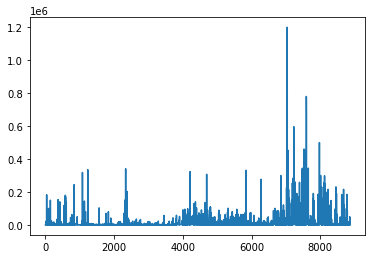

In [14]:
buildings["Square Footage"].plot() 
plt.show()

What can we do with this plot?  What are our options?

Check out: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

While the above was a "quick and dirty" plot, we can do fancier things:

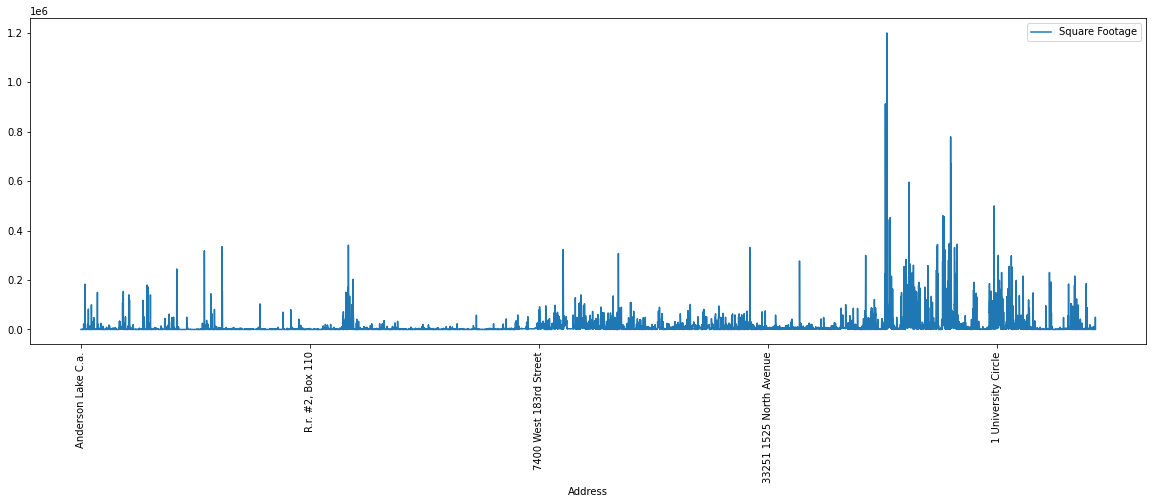

In [15]:
buildings.plot(x = "Address", y="Square Footage", figsize=(20,6), rot=90)

You can also use Pandas to generate the plot and then give you back the matplotlib `ax` objects we've been dealing with before:

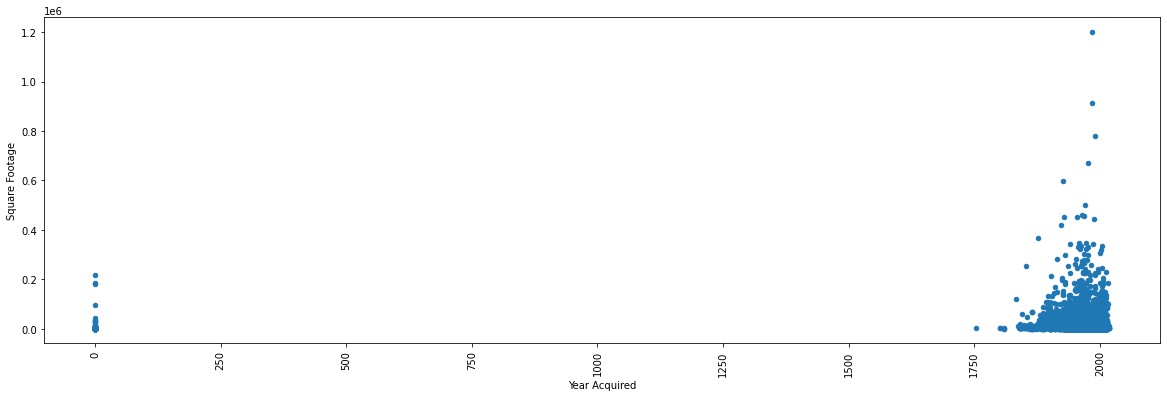

In [16]:
ax = buildings.plot(x = "Year Acquired", y="Square Footage", figsize=(20,6), rot=90, kind='scatter')

(1750.0, 2010.0)

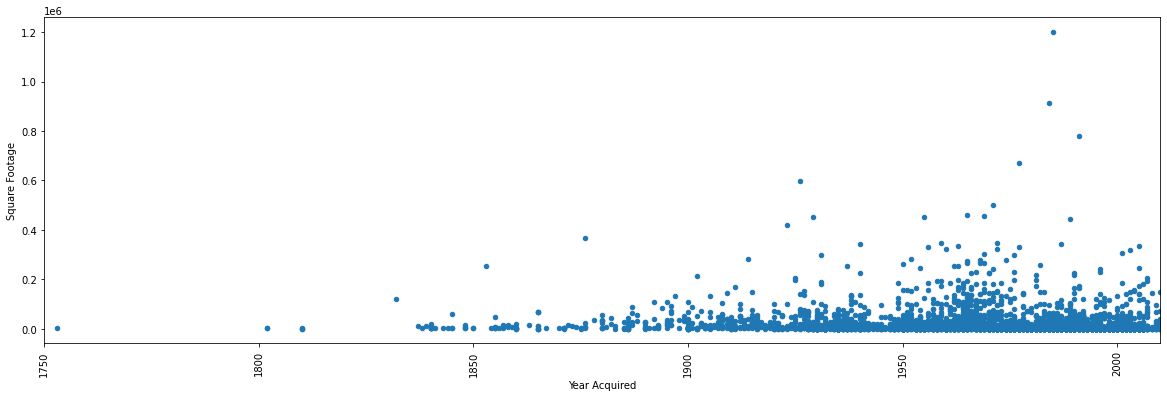

In [17]:
ax = buildings.plot(x = "Year Acquired", y="Square Footage", figsize=(20,6), rot=90, kind='scatter')
ax.set_xlim(1750, 2010)

There are also some useful sorting functions within Pandas.  The `groupby` function can seem a little nebulous, but its a way to sort of "re-index" our datasets.  Here we'll re-group our data by the building's status:

In [18]:
buildings.groupby("Bldg Status") # this doesn't do anything until you call it

Now actually do something with this object, here, just print out - you can see "abandon" is at the top - so i first lists off all of the abandoned buildings.

In [19]:
for grouped in buildings.groupby("Bldg Status"):
    print(grouped)

('Abandon',                                     Agency Name  \
381                Department of Human Services   
449             Department of Natural Resources   
1050            Department of Natural Resources   
1139  Department of Central Management Services   
1172            Department of Natural Resources   
...                                         ...   
8682             Department of Military Affairs   
8683             Department of Military Affairs   
8760               Historic Preservation Agency   
8800             Department of Military Affairs   
8801             Department of Military Affairs   

                                         Location Name  \
381        Lincoln Developmental Center - Logan County   
449       Clinton Lake Recreation Area - DeWitt County   
1050           Jim Edgar Panther Creek F&WA - Cass Co.   
1139                                 Statewide Program   
1172   Saline County Conservation Area - Saline County   
...                        

In [20]:
for status, df in buildings.groupby("Bldg Status"):
    print(status, df.shape[0])

Abandon 226
In Progress 113
In Use 8523


We can also apply NumPy-like functions, for example `max`:

In [21]:
#buildings.max()
buildings["Square Footage"].max()

1200000

In [22]:
buildings["Square Footage"].min()

0

Note we get something very silly - that the minimum square footage is zero!  Let's try to fix this.

There are several differnet options for *how* to read data with Pandas.  For example, we can tell Pandas what to do with empty entries, i.e. ones with a `NaN` tag.

In [23]:
pd.read_csv?

In [24]:
b = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/building_inventory.csv",
           na_values = {'Square Footage': 0,
                       'Year Acquired': 0,
                       'Year Constructed': 0}) 
# specify what to do with incomplete entries, here this just says if any of these columns have a value 0, treat
#  as a NaN or not-a-number

Now we can take mins/maxes of things and actually get some reasonable answers:

In [25]:
b["Square Footage"].min()

9.0

In [26]:
b["Year Constructed"].min()

1753.0

In [27]:
b["Year Acquired"].min()

1753.0

In [28]:
b.loc[b["Year Acquired"] < 1800]

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
2796,Historic Preservation Agency,Fort De Chartres Historic Site - Prairie Du Ro...,1350 State Hwy 155,Prairie Du Rocher,62241,Randolph,12,Mike Bost,116,"Costello, II Jerry",...,In Use,1753.0,1753.0,1200.0,1,1,0,Assembly,Assembly,Not provided


We can also mutate Pandas dataframes into new data with operations like sorting:

In [29]:
b2 = b.sort_values("Year Constructed")
b2

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
119,Historic Preservation Agency,Fort De Chartres Historic Site - Prairie Du Ro...,1350 State Hwy 155,Prairie Du Rocher,62241,Randolph,12,Mike Bost,116,"Costello, II Jerry",...,In Use,1930.0,1753.0,2580.0,1,1,0,Assembly,Residential,Not provided
120,Historic Preservation Agency,Fort De Chartres Historic Site - Prairie Du Ro...,1350 State Hwy 155,Prairie Du Rocher,62241,Randolph,12,Mike Bost,116,"Costello, II Jerry",...,In Use,1986.0,1753.0,4184.0,1,1,0,Assembly,Residential,Not provided
121,Historic Preservation Agency,Fort De Chartres Historic Site - Prairie Du Ro...,1350 State Hwy 155,Prairie Du Rocher,62241,Randolph,12,Mike Bost,116,"Costello, II Jerry",...,In Use,1986.0,1753.0,2875.0,1,1,0,Assembly,Residential,Not provided
122,Historic Preservation Agency,Fort De Chartres Historic Site - Prairie Du Ro...,1350 State Hwy 155,Prairie Du Rocher,62241,Randolph,12,Mike Bost,116,"Costello, II Jerry",...,In Use,1930.0,1753.0,558.0,2,2,0,Assembly,Assembly,Not provided
118,Historic Preservation Agency,Fort De Chartres Historic Site - Prairie Du Ro...,1350 State Hwy 155,Prairie Du Rocher,62241,Randolph,12,Mike Bost,116,"Costello, II Jerry",...,In Use,1930.0,1753.0,3604.0,1,1,0,Assembly,Residential,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8847,Department of Transportation,Elgin/O'Hare Expressway - Kane Co.,1480 Rodenburg Road,Schaumburg,60193,Kane,8,Tammy Duckworth,43,Moeller Anna,...,In Use,NaN,NaN,36.0,1,0,0,Utiility & Miscellan,Utiility & Miscellan,NaN
8855,Department of Transportation,Roscoe Maintenance Storage Facility,9988 N. 2nd Street,Roscoe,61073,Winnebago,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,NaN,1550.0,1,0,0,Storage,NaN,NaN
8856,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,NaN,1500.0,1,0,0,Storage,NaN,NaN
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,NaN,432.0,1,0,0,Storage,NaN,NaN


In [30]:
b2.iloc[0] # this gives the oldest building - the one that was constructed in 1753

Agency Name                                     Historic Preservation Agency
Location Name              Fort De Chartres Historic Site - Prairie Du Ro...
Address                                                   1350 State Hwy 155
City                                                       Prairie Du Rocher
Zip code                                                               62241
County                                                              Randolph
Congress Dist                                                             12
Congressional Full Name                                            Mike Bost
Rep Dist                                                                 116
Rep Full Name                                             Costello, II Jerry
Senate Dist                                                               58
Senator Full Name                                               Paul Schimpf
Bldg Status                                                           In Use

We can build up Pandas commands to get new sorts of aggregated data:

In [31]:
b.groupby("Year Acquired")["Square Footage"].sum()

Year Acquired
1753.0      1200.0
1802.0      4440.0
1810.0      4033.0
1832.0    120000.0
1837.0     10302.0
            ...   
2015.0    305093.0
2016.0    304839.0
2017.0      6720.0
2018.0     17160.0
2019.0      1520.0
Name: Square Footage, Length: 171, dtype: float64

We can then use that to make different plots:

In [32]:
aggregated_data = b.groupby("Year Acquired")["Square Footage"].sum()

What sort of a thing is this variable?

In [33]:
type(aggregated_data)

pandas.core.series.Series

This is another `pandas` specific variable type - a series.  Its kind of like a "mini" dataframe.

Here we have grouped by `Year Acquired`, so that will be our how our data is indexed:

In [34]:
aggregated_data.index 

Float64Index([1753.0, 1802.0, 1810.0, 1832.0, 1837.0, 1838.0, 1839.0, 1840.0,
              1841.0, 1843.0,
              ...
              2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0,
              2018.0, 2019.0],
             dtype='float64', name='Year Acquired', length=171)

And values of our series object will just be total square footage for each year:

In [35]:
aggregated_data.values

array([1.200000e+03, 4.440000e+03, 4.033000e+03, 1.200000e+05,
       1.030200e+04, 2.010000e+03, 1.175200e+04, 3.691800e+04,
       3.256000e+03, 9.000000e+02, 4.088000e+03, 6.584600e+04,
       2.129200e+04, 2.267000e+03, 2.550000e+05, 2.140000e+03,
       6.615400e+04, 7.500000e+02, 1.812400e+04, 2.236700e+04,
       4.847000e+03, 2.741700e+04, 1.579500e+04, 2.234940e+05,
       2.700000e+03, 2.864000e+03, 6.403000e+03, 1.490000e+04,
       1.100000e+04, 6.600000e+03, 3.808000e+03, 4.042800e+05,
       3.307100e+04, 1.798330e+05, 6.671000e+03, 5.926600e+04,
       8.725000e+03, 3.015700e+04, 1.683700e+05, 1.948230e+05,
       8.492400e+04, 8.633400e+04, 2.325000e+03, 1.514800e+05,
       3.959000e+04, 8.500000e+04, 2.256770e+05, 2.901650e+05,
       1.329070e+05, 3.676000e+04, 1.214750e+05, 3.358350e+05,
       1.094860e+05, 2.697250e+05, 1.605840e+05, 4.096400e+04,
       3.128860e+05, 2.037400e+04, 1.332850e+05, 3.602520e+05,
       2.982830e+05, 2.314110e+05, 2.377220e+05, 4.2281

Let's make some quick plots:

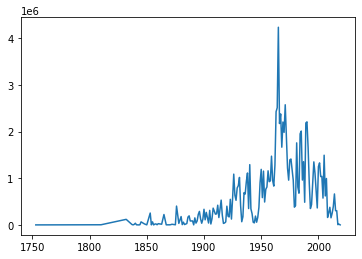

In [36]:
plt.plot(aggregated_data.index, aggregated_data.values)

We can also use pandas plots to do this as well:

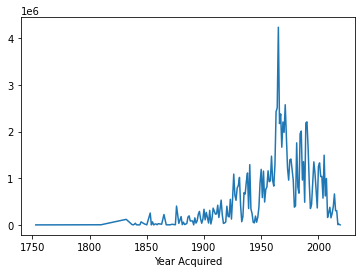

In [37]:
aggregated_data = b.groupby("Year Acquired")["Square Footage"].sum()
aggregated_data.plot()

We can aggregate in a bunch of different ways!

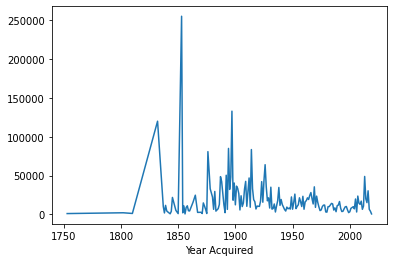

In [38]:
aggregated_data_average = b.groupby("Year Acquired")["Square Footage"].mean()
aggregated_data_average.plot()

**ASIDE:** Let's go bananas!  We want:
 * only buildings from the University of Illinois
 * Ordered by the Year Acquired
 * And we what the total square footage for reach year!

In [39]:
b.loc[b["Agency Name"] == "University of Illinois"].groupby("Year Acquired")["Square Footage"].sum()

Year Acquired
1857.0      3000.0
1870.0      2864.0
1878.0     33071.0
1888.0     28746.0
1890.0     27409.0
            ...   
2006.0    180000.0
2008.0    144580.0
2010.0     35000.0
2013.0    230665.0
2015.0      8283.0
Name: Square Footage, Length: 105, dtype: float64

In [40]:
mySortedVariable = b.loc[b["Agency Name"] == "University of Illinois"].groupby("Year Acquired")["Square Footage"].sum()

Let's make a nice plot of this!

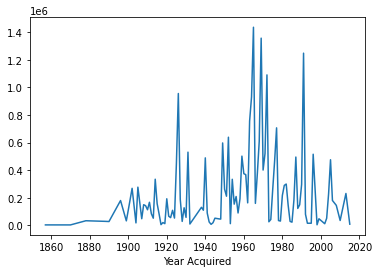

In [41]:
mySortedVariable.plot() # y-axis is total square footage

**END ASIDE**

Let's try another one: how much square footage was created in different years across all agencies:

In [42]:
b.groupby("Year Acquired")["Square Footage"].sum()

Year Acquired
1753.0      1200.0
1802.0      4440.0
1810.0      4033.0
1832.0    120000.0
1837.0     10302.0
            ...   
2015.0    305093.0
2016.0    304839.0
2017.0      6720.0
2018.0     17160.0
2019.0      1520.0
Name: Square Footage, Length: 171, dtype: float64

W can now also look at statistics of our subset from different years using "describe" as we've done before for the full dataset.  In this way we can "mutate" our data:

In [43]:
stats = b.groupby("Year Acquired")["Square Footage"].describe()
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


This allows us to check out the distributions of each year.  For example, let's look at stats from 2015.  Because our `stats` dataframe that we've just created is indexed by year, we can just look for details about a specific year:

In [44]:
stats.loc[2015]

count        20.00000
mean      15254.65000
std       29153.08529
min         144.00000
25%         696.00000
50%        3152.00000
75%       10590.25000
max      105000.00000
Name: 2015.0, dtype: float64

We can also check out the statistics by index, in this case we look at the very first entry:

In [45]:
stats.iloc[0]
# since we have only the one entry, the STD is meaningless

count       1.0
mean     1200.0
std         NaN
min      1200.0
25%      1200.0
50%      1200.0
75%      1200.0
max      1200.0
Name: 1753.0, dtype: float64

Alright, so this is in fact a data viz class so lets make some plots then!

Lets first start by plotting the **maximum** square footage of any buildings created in a particular year:

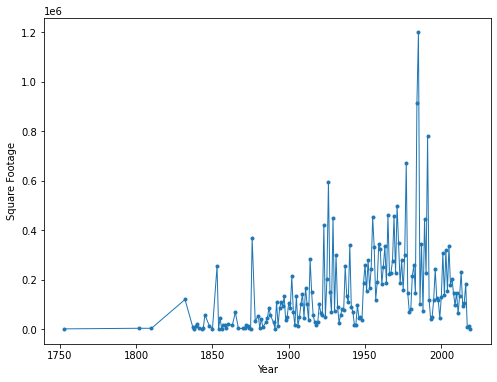

In [46]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats["max"], marker='.', linewidth = 1.0)
ax.set_xlabel("Year")
ax.set_ylabel("Square Footage")
plt.show()

We can see that there is a large range of square footages - from around 0 to millions.  We'd like to see this better, so lets apply a "mutation" to our data in the form of how we visualize it:

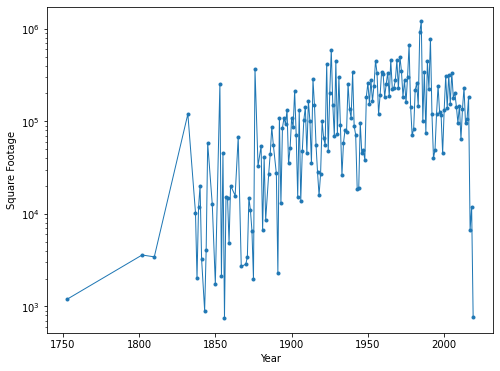

In [47]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats["max"], marker='.', linewidth = 1.0)
ax.set_xlabel("Year")
ax.set_ylabel("Square Footage")
ax.set_yscale("log")
plt.show()

Now we can see a wider range of values from very small to very large on this log-scale. What this visualization is showing is out of all the  buildings built in a given year, what is the largest building (in square footage) that has been built.

We can make a similar plot for the minimum value of the square footage of buildings built in a year:

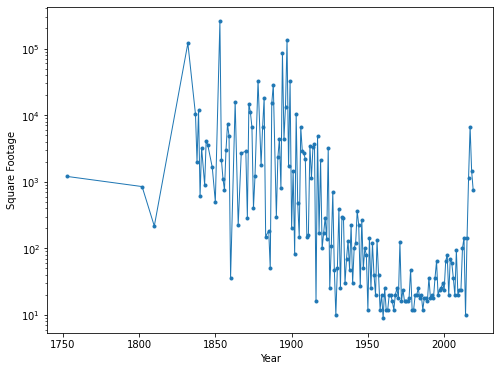

In [48]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats["min"], marker='.', linewidth = 1.0)
ax.set_xlabel("Year")
ax.set_ylabel("Square Footage")
ax.set_yscale("log")
plt.show()

## Take away
* so far we have now played a bit with how to read in a dataset, look at different values in nicely formatted pandas tables, or by hand by checking out different values at different indicies
* We also started making some simple plots: the above plots show two different values from the same dataset - the maximum and minimum values for the square footage built in a year.
* Now we are going to get into some methods to combine the plots of these two different values (the min & max square footage), and some ways to "fancyify" our plots with things like interactive widgets

# Plotting styles and default plotting colormaps

Let's now plot both min and max on the same plot:

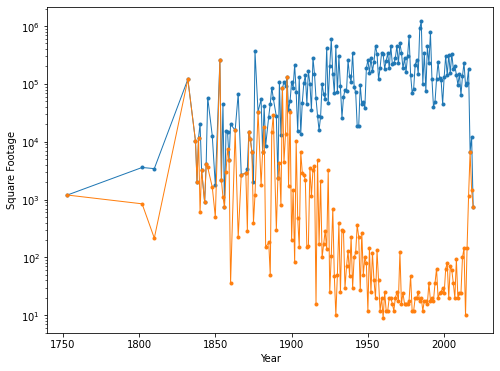

In [49]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats["max"], marker='.', linewidth = 1.0)
ax.plot(stats["min"], marker='.', linewidth = 1.0)
ax.set_xlabel("Year")
ax.set_ylabel("Square Footage")
ax.set_yscale("log")
plt.show()

But which is which??  Let's add a legend:

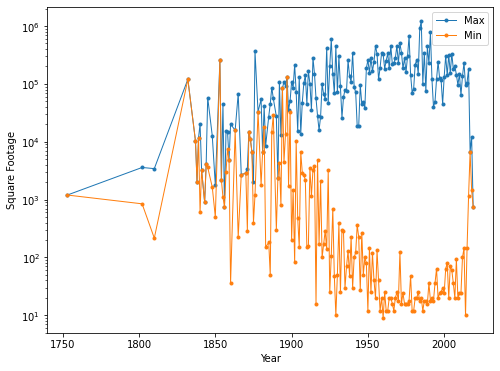

In [50]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats["max"], marker='.', linewidth = 1.0, label="Max")
ax.plot(stats["min"], marker='.', linewidth = 1.0, label="Min")
ax.set_xlabel("Year")
ax.set_ylabel("Square Footage")
ax.set_yscale("log")

# Note the difference between who "owns" this legend
#fig.legend()
ax.legend()

plt.show()

But lets say what I really want to highlight in my visualization is to hightlight the difference between the maximum & minimum square footage of buildings aquired in a year - this might be a good measure of the diversity of buildings that are built in a year (but there are certainly other factors).

I'll use a "fill between" plotting call to do this:

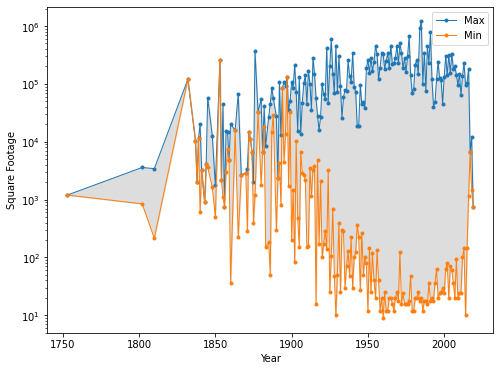

In [51]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(stats["max"], marker='.', linewidth = 1.0, label="Max")
ax.plot(stats["min"], marker='.', linewidth = 1.0, label="Min")
ax.set_xlabel("Year")
ax.set_ylabel("Square Footage")
ax.set_yscale("log")

ax.fill_between(stats.index, stats["min"], stats["max"], color = "#dddddd")

ax.legend()

plt.show()

So with this fill in we can see something interesting - as the years progress we are getting a greater diversity of buildings sq footage - the bigger things are getting bigger & smaller things getting smaller, though, this difference seems to peak around 1975 (not sure why).

We can also see that it seems like more square footage started being built in ~1850 - this makes sense since UIUC was founded in 1868. 

There were also large expansions around the early 1900's Willard airport was completed in 1954 after a period of large expansion after WWII.

### Plotting Style

Now, lets play with something called the "style" of the plot. If you've used R, you might have used the "ggplot" package, we can make plots in this style with Python too:

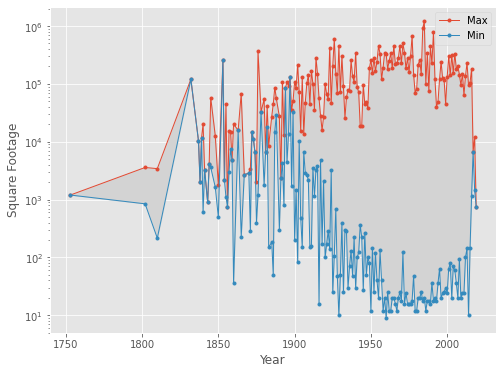

In [52]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(stats["max"], marker='.', linewidth = 1.0, label = "Max")
    ax.plot(stats["min"], marker='.', linewidth = 1.0, label = "Min")
    ax.fill_between(stats.index, stats["min"], stats["max"], color = "lightgray")
    ax.set_xlabel("Year")
    ax.set_ylabel("Square Footage")
    ax.set_yscale("log")
    ax.legend()
plt.show()

### The `with` statement

Why did I use this "with" thing?

This is a way to set something that is generally a "global" parameter only for one plot.  For example, I could have done:

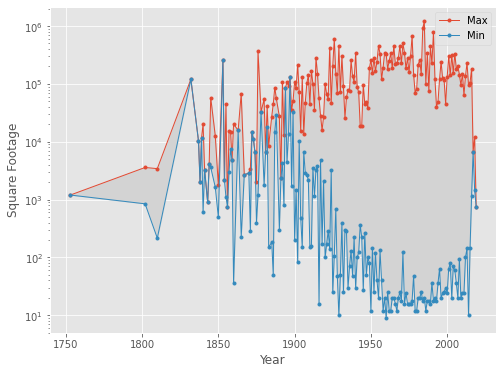

In [53]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(stats["max"], marker='.', linewidth = 1.0, label = "Max")
ax.plot(stats["min"], marker='.', linewidth = 1.0, label = "Min")
ax.fill_between(stats.index, stats["min"], stats["max"], color = "lightgray")
ax.set_xlabel("Year")
ax.set_ylabel("Square Footage")
ax.set_yscale("log")
ax.legend()

plt.show()

But now, if I want to plot something else:

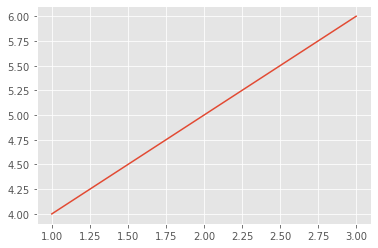

In [54]:
plt.plot([1,2,3], [4,5,6])

It has kept the "ggplot" style.  If I want to change things, for just one plot, I can use the `with` and it will *only* do it for whatever is under the `with` statement:

In [55]:
plt.style.use("default")

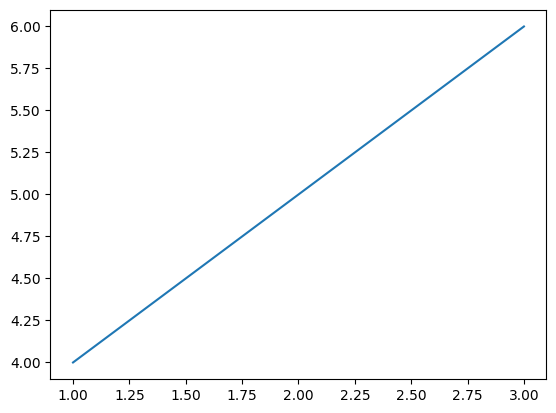

In [56]:
plt.plot([1,2,3], [4,5,6])

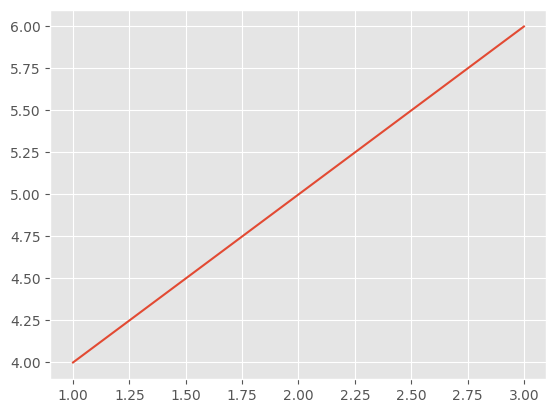

In [57]:
with plt.style.context("ggplot"):
    plt.plot([1,2,3], [4,5,6])

Ok, now that we have that sorted, back to what we were doing!

Let's see what plotting styles might be available:

In [58]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

But what if we want to see how our plot would look with each of these styles?  We could just make a bunch of plots OR we can play with this interactively with the `ipywidgets` library.

We'll talk about `ipywidgets` extensively starting next week, but we can dip our toes into this package now and start getting a feel for how they work.

In [59]:
import ipywidgets

First, lets tell jupyter `ipywidgets` that we want to mess around with the style of the plot:

In [60]:
@ipywidgets.interact(style = plt.style.available)
def make_plot(style):
    with plt.style.context(style):
        fig, ax = plt.subplots(figsize=(8,6))
        ax.plot(stats["max"], marker='.', linewidth = 1.0, label = "Max")
        ax.plot(stats["min"], marker='.', linewidth = 1.0, label = "Min")
        ax.fill_between(stats.index, stats["min"], stats["max"], color = "lightgray")
        ax.set_xlabel("Year")
        ax.set_ylabel("Square Footage")
        ax.set_yscale("log")
        ax.legend()        
# so now you can see that we get a little dropdown menu that lists
# all the different styles!
#  **play with this a bit!!**

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

Ok, but what did we just do?  We made something in Jupyter interactive.  We'll have a lot of opportunities to mess around with widgets in this class, but I'll just show a few quick examples.  

Read more on the docs: https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html

Basically what `ipywidgets.interact` does is looks for a function with inputs and makes a little interactive option for those inputs, so like we did with the "make_plot" function above we can do for other things like change the value of a print statement:

In [61]:
@ipywidgets.interact(x=10)
def f(x):
    print("my value = " + str(x))

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

Note this is a little different to the format in the docs and you can use what you'd like the "@" symbol is a `decorator` and essentially its a way to sort of "extend" the `interact` function without modifying it to much.

We'll play with these more in the next few weeks, but for now we can use them as simple style/color pickers!

# Matplotlib colormaps

In addition to different plotting styles, there are different sorts of colormaps in the `matplotlib` package, let's check them out:

In [62]:
import matplotlib.cm as cm

We can see a list of all these color maps:

In [63]:
matplotlib.pyplot.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

### Aside: plotting matplotlib colormaps

There are TONS of ways to do it, here is just one:

Accent


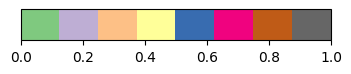

Accent_r


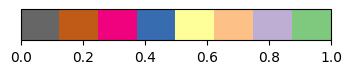

Blues


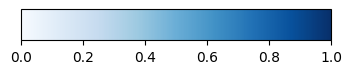

Blues_r


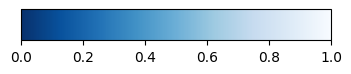

BrBG


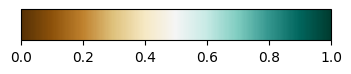

BrBG_r


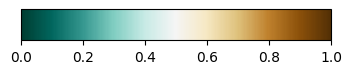

BuGn


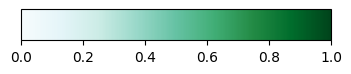

BuGn_r


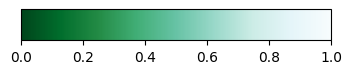

BuPu


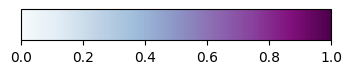

BuPu_r


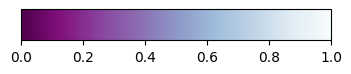

CMRmap


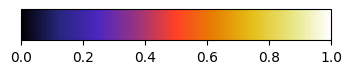

CMRmap_r


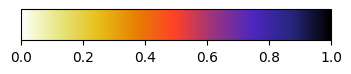

Dark2


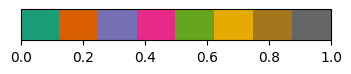

Dark2_r


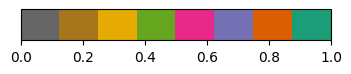

GnBu


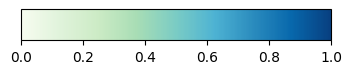

GnBu_r


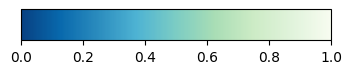

Greens


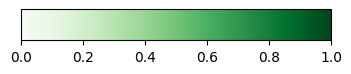

Greens_r


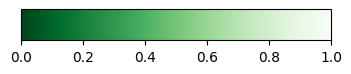

Greys


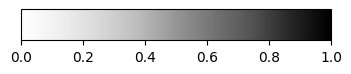

Greys_r


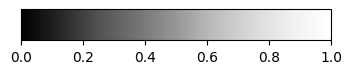

OrRd


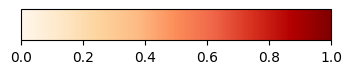

OrRd_r


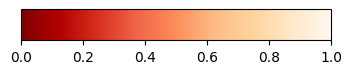

Oranges


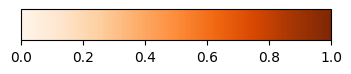

Oranges_r


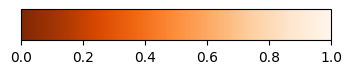

PRGn


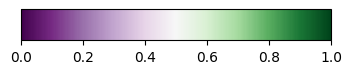

PRGn_r


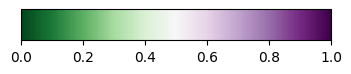

Paired


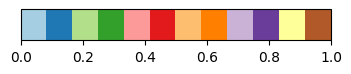

Paired_r


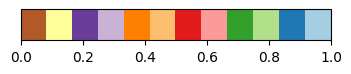

Pastel1


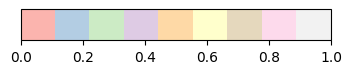

Pastel1_r


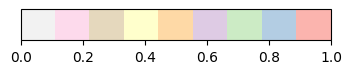

Pastel2


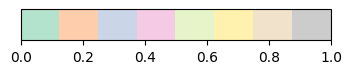

Pastel2_r


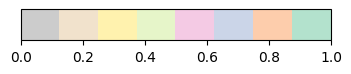

PiYG


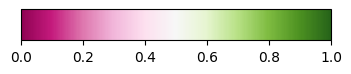

PiYG_r


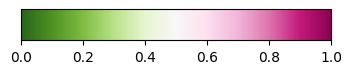

PuBu


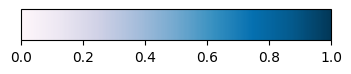

PuBuGn


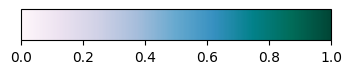

PuBuGn_r


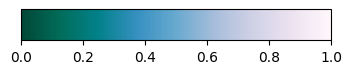

PuBu_r


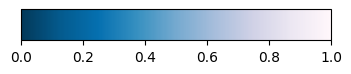

PuOr


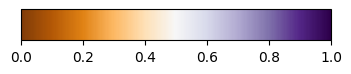

PuOr_r


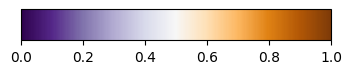

PuRd


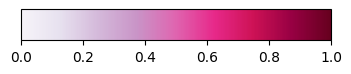

PuRd_r


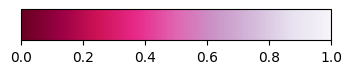

Purples


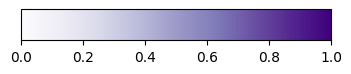

Purples_r


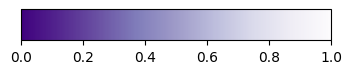

RdBu


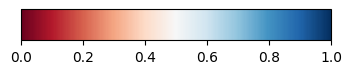

RdBu_r


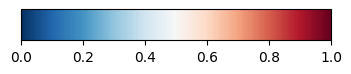

RdGy


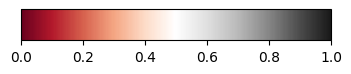

RdGy_r


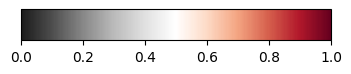

RdPu


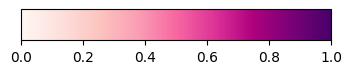

RdPu_r


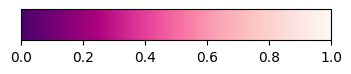

RdYlBu


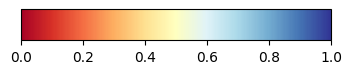

RdYlBu_r


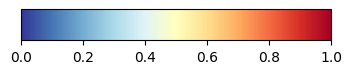

RdYlGn


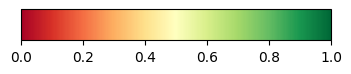

RdYlGn_r


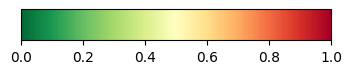

Reds


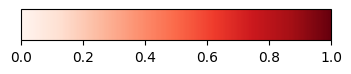

Reds_r


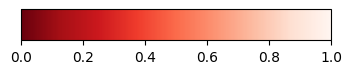

Set1


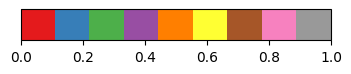

Set1_r


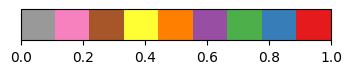

Set2


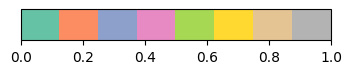

Set2_r


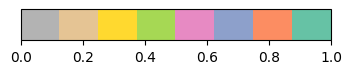

Set3


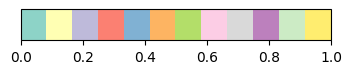

Set3_r


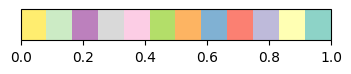

Spectral


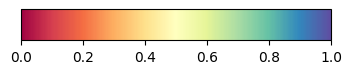

Spectral_r


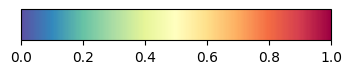

Wistia


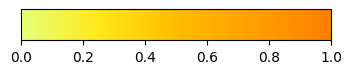

Wistia_r


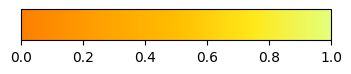

YlGn


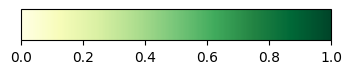

YlGnBu


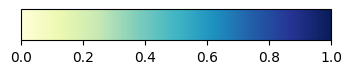

YlGnBu_r


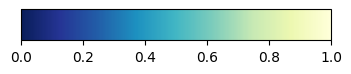

YlGn_r


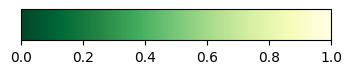

YlOrBr


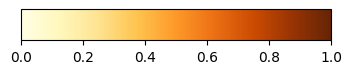

YlOrBr_r


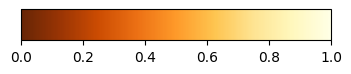

YlOrRd


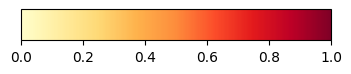

YlOrRd_r


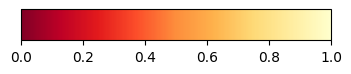

afmhot


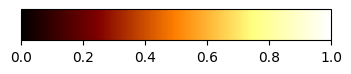

afmhot_r


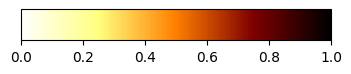

autumn


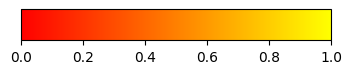

autumn_r


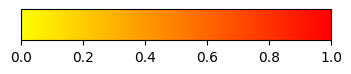

binary


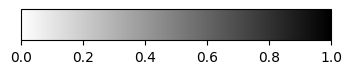

binary_r


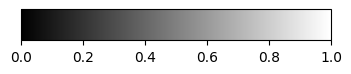

bone


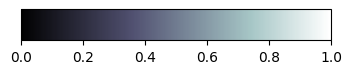

bone_r


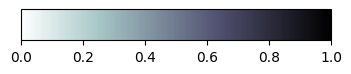

brg


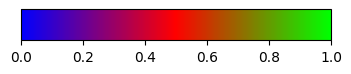

brg_r


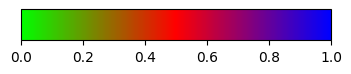

bwr


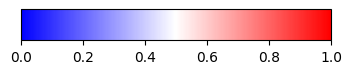

bwr_r


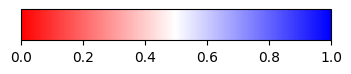

cividis


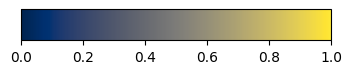

cividis_r


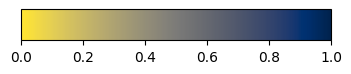

cool


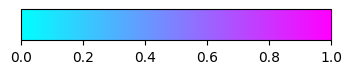

cool_r


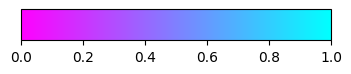

coolwarm


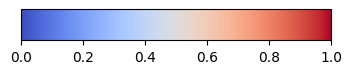

coolwarm_r


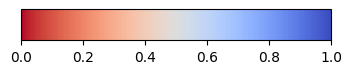

copper


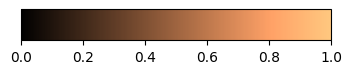

copper_r


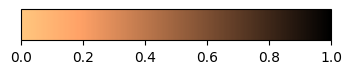

cubehelix


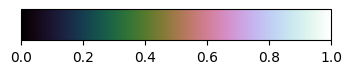

cubehelix_r


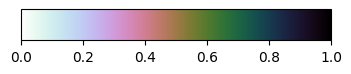

flag


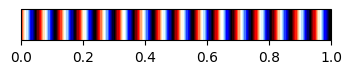

flag_r


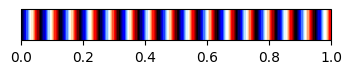

gist_earth


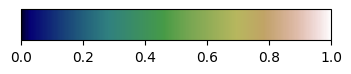

gist_earth_r


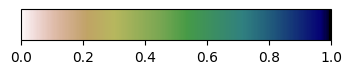

gist_gray


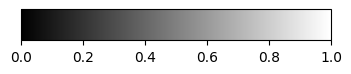

gist_gray_r


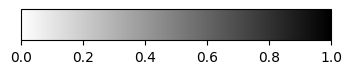

gist_heat


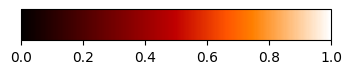

gist_heat_r


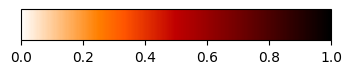

gist_ncar


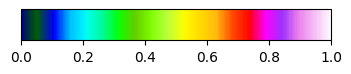

gist_ncar_r


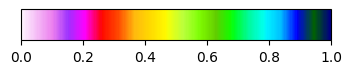

gist_rainbow


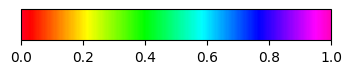

gist_rainbow_r


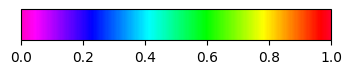

gist_stern


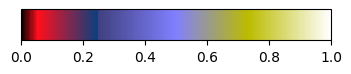

gist_stern_r


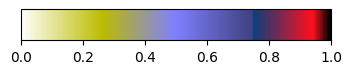

gist_yarg


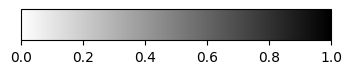

gist_yarg_r


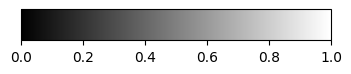

gnuplot


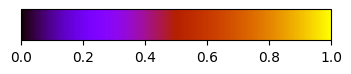

gnuplot2


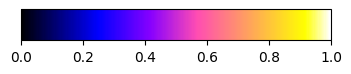

gnuplot2_r


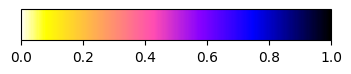

gnuplot_r


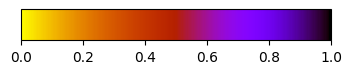

gray


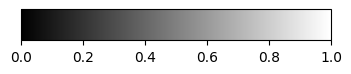

gray_r


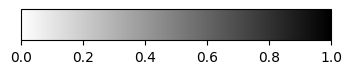

hot


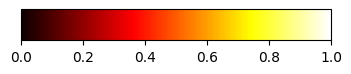

hot_r


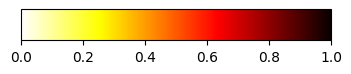

hsv


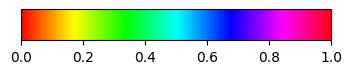

hsv_r


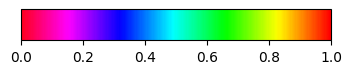

inferno


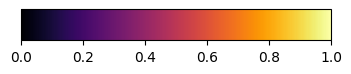

inferno_r


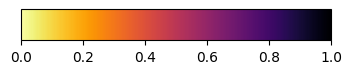

jet


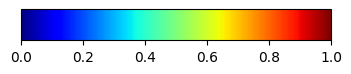

jet_r


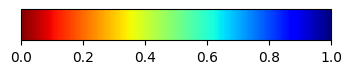

magma


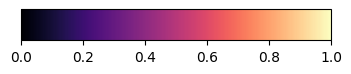

magma_r


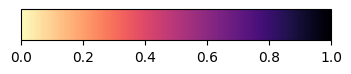

nipy_spectral


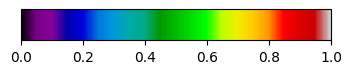

nipy_spectral_r


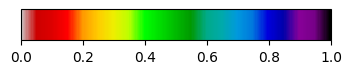

ocean


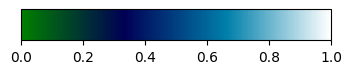

ocean_r


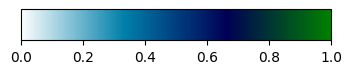

pink


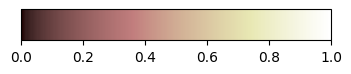

pink_r


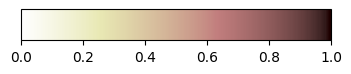

plasma


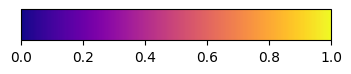

plasma_r


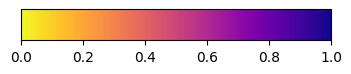

prism


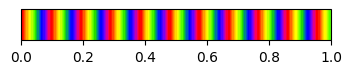

prism_r


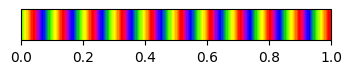

rainbow


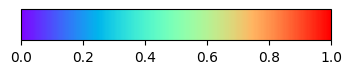

rainbow_r


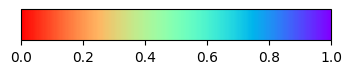

seismic


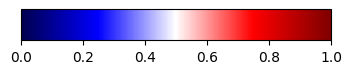

seismic_r


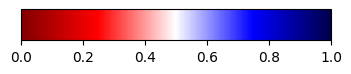

spring


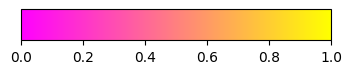

spring_r


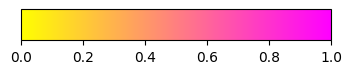

summer


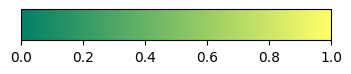

summer_r


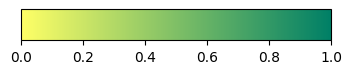

tab10


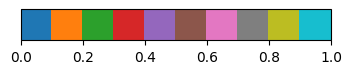

tab10_r


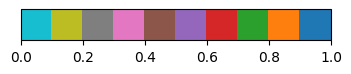

tab20


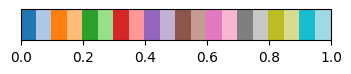

tab20_r


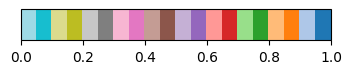

tab20b


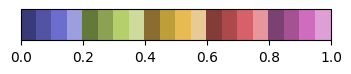

tab20b_r


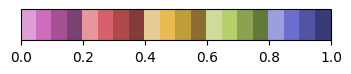

tab20c


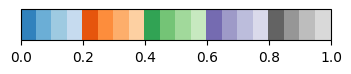

tab20c_r


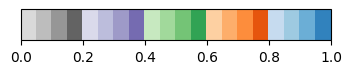

terrain


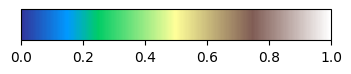

terrain_r


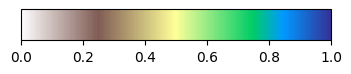

twilight


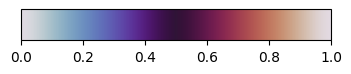

twilight_r


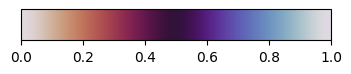

twilight_shifted


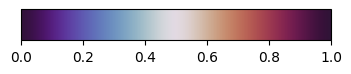

twilight_shifted_r


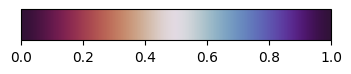

viridis


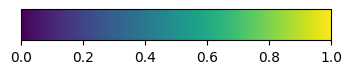

viridis_r


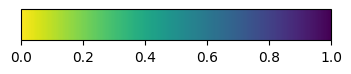

winter


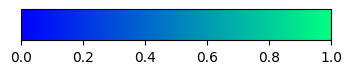

winter_r


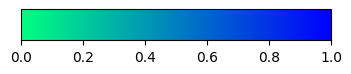

In [64]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_colorMaps(cmap):

    fig, ax = plt.subplots(figsize=(4,0.4))
    col_map = plt.get_cmap(cmap) # get a specific color map
    mpl.colorbar.ColorbarBase(ax, cmap=col_map, orientation = 'horizontal')

    plt.show()

for cmap_id in plt.colormaps():
    print(cmap_id)
    plot_colorMaps(cmap_id)

But obviously, we wanna widget-it!

In [65]:
@ipywidgets.interact(colormap = plt.colormaps())
def make_plot(colormap):
    fig, ax = plt.subplots(figsize=(8,0.8))
    col_map = plt.get_cmap(colormap)
    mpl.colorbar.ColorbarBase(ax, cmap=col_map, orientation = 'horizontal')
    ax.xaxis.set_visible(False)
    plt.show()


interactive(children=(Dropdown(description='colormap', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrB…

Note that in this case we did *not* use the `with` statement.

In [66]:
#cmap = plt.get_cmap('CMRmap')
col_map = plt.get_cmap('jet')
color_steps = np.linspace(0,1.0,256)
colors = col_map(color_steps)[:,:3]
#colors

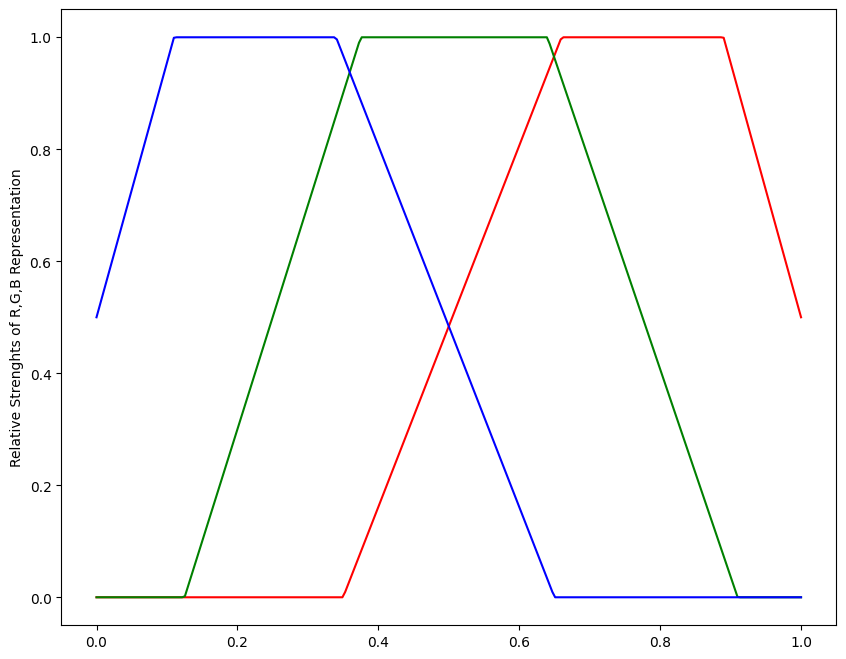

In [67]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(color_steps, colors[:,0], '-r')
ax.plot(color_steps, colors[:,1], '-g')
ax.plot(color_steps, colors[:,2], '-b')
ax.set_ylabel('Relative Strenghts of R,G,B Representation')
plt.show()

Nice-ifying our plot, since the x-range is sort of arbitrary:

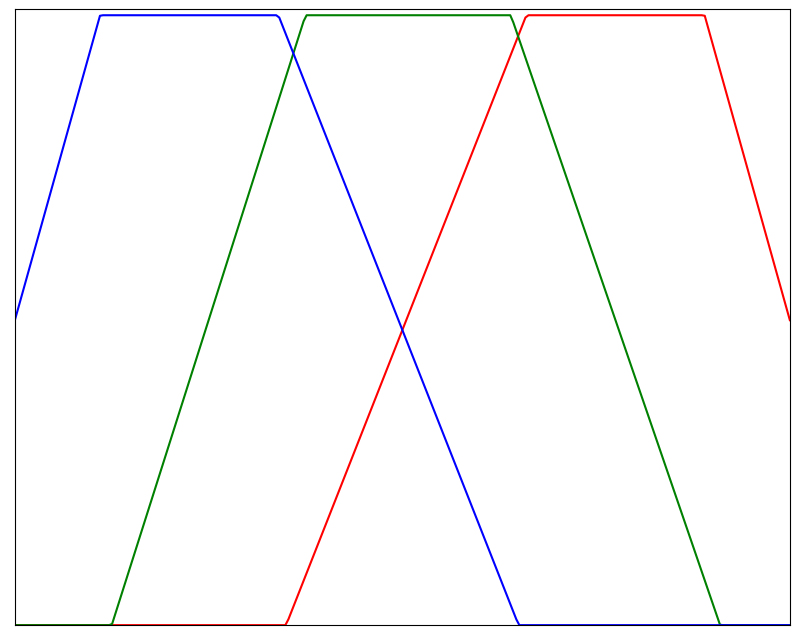

In [68]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(color_steps, colors[:,0], '-r')
ax.plot(color_steps, colors[:,1], '-g')
ax.plot(color_steps, colors[:,2], '-b')
ax.set_ylabel('Relative Strenghts of R,G,B Representation')

ax.set_xlim(0.0, 1.0) # first I'm just gonna set this a little wider so the tops don't get cut off
ax.set_ylim(0.0, 1.01)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False) 


plt.show()

Obviously, we wanna combine the two plots to make a representation of any colormap.  We'll do that by adding some matplotlib axes "by hand":

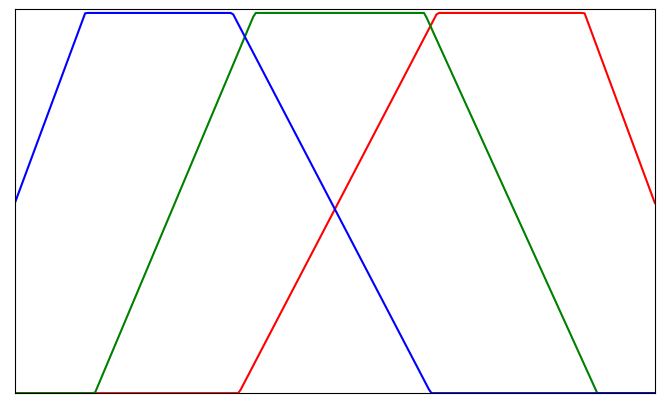

In [69]:
fig = plt.figure() # create a figure object, but don't specify axes

# order here is: left, bottom, width, height
ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) # first set of axis: will hold color-levels plot

# this axes object will hold our colorlines:
ax.plot(color_steps, colors[:,0], '-r')
ax.plot(color_steps, colors[:,1], '-g')
ax.plot(color_steps, colors[:,2], '-b')
ax.set_ylabel('Relative Strenghts of R,G,B Representation')

ax.set_xlim(0.0, 1.0) # first I'm just gonna set this a little wider so the tops don't get cut off
ax.set_ylim(0.0, 1.01)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False) 


plt.show()

Now, let's add in another set of axis for our lovely colorbar plot:

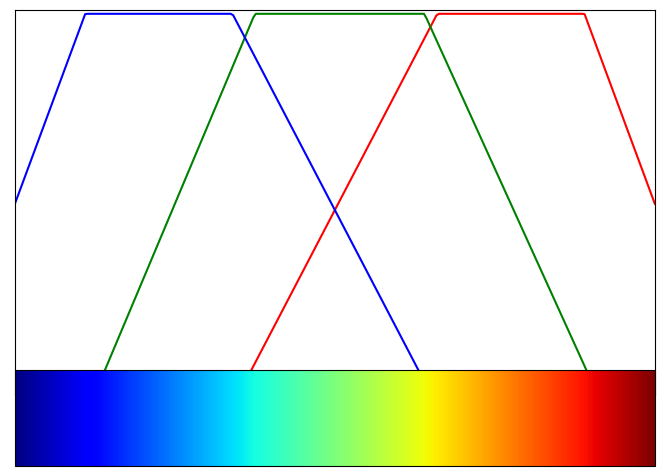

In [70]:
fig = plt.figure() # create a figure object, but don't specify axes

# order here is: left, bottom, width, height
ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) # first set of axis: will hold color-levels plot

# this axes object will hold our colorlines:
ax.plot(color_steps, colors[:,0], '-r')
ax.plot(color_steps, colors[:,1], '-g')
ax.plot(color_steps, colors[:,2], '-b')
ax.set_ylabel('Relative Strenghts of R,G,B Representation')

ax.set_xlim(0.0, 1.0) # first I'm just gonna set this a little wider so the tops don't get cut off
ax.set_ylim(0.0, 1.01)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False) 

# colorbar
ax_colorbar = fig.add_axes([0.0, 0.0, 1.0, 0.2]) # right below our color lines
###col_map = plt.get_cmap('jet')
mpl.colorbar.ColorbarBase(ax_colorbar, cmap=col_map, orientation = 'horizontal')
ax_colorbar.xaxis.set_visible(False)

plt.show()

Now, let's turn this into a function so we can do it for any colormap!

In [71]:
color_steps = np.linspace(0,1.0,256) # never changes, can put outside

def plot_colormap(colormap_name):
    fig = plt.figure() # create a figure object, but don't specify axes
    
    col_map = plt.get_cmap(colormap_name) # for both plots
    colors = col_map(color_steps)[:,:3] # need to re-derive both times

    # order here is: left, bottom, width, height
    ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) # first set of axis: will hold color-levels plot

    # this axes object will hold our colorlines:
    ax.plot(color_steps, colors[:,0], '-r')
    ax.plot(color_steps, colors[:,1], '-g')
    ax.plot(color_steps, colors[:,2], '-b')
    ax.set_ylabel('Relative Strenghts of R,G,B Representation')

    ax.set_xlim(0.0, 1.0) # first I'm just gonna set this a little wider so the tops don't get cut off
    ax.set_ylim(0.0, 1.01)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False) 

    # colorbar
    ax_colorbar = fig.add_axes([0.0, 0.0, 1.0, 0.2]) # right below our color lines
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=col_map, orientation = 'horizontal')
    ax_colorbar.xaxis.set_visible(False)

    plt.show()

Now let's try calling it:

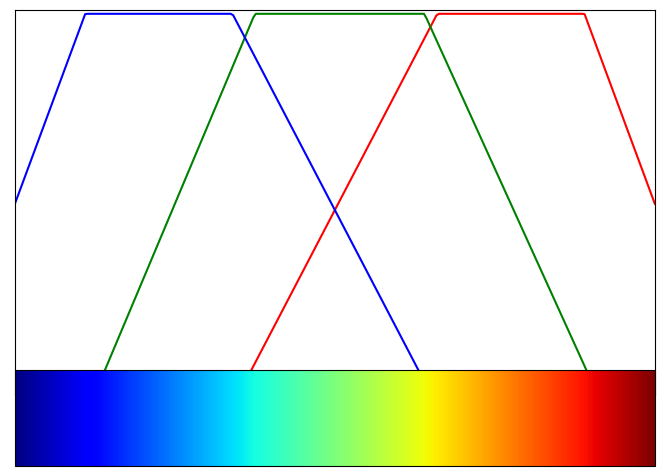

In [72]:
plot_colormap('jet')

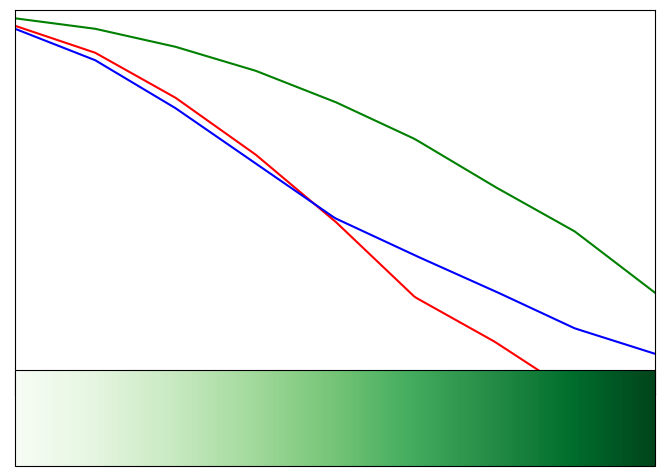

In [73]:
plot_colormap('Greens')

Finally, let's widgetizie it!

In [74]:
color_steps = np.linspace(0,1.0,256) # never changes, can put outside

@ipywidgets.interact(colormap_name = plt.colormaps())
def plot_colormap(colormap_name):
    fig = plt.figure() # create a figure object, but don't specify axes
    
    col_map = plt.get_cmap(colormap_name) # for both plots
    colors = col_map(color_steps)[:,:3] # need to re-derive both times

    # order here is: left, bottom, width, height
    ax = fig.add_axes([0.0, 0.15, 1.0, 0.8]) # first set of axis: will hold color-levels plot

    # this axes object will hold our colorlines:
    ax.plot(color_steps, colors[:,0], '-r')
    ax.plot(color_steps, colors[:,1], '-g')
    ax.plot(color_steps, colors[:,2], '-b')
    ###ax.set_ylabel('Relative Strenghts of R,G,B Representation')

    ax.set_xlim(0.0, 1.0) # first I'm just gonna set this a little wider so the tops don't get cut off
    ax.set_ylim(0.0, 1.01)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False) 

    # colorbar
    ax_colorbar = fig.add_axes([0.0, 0.0, 1.0, 0.2]) # right below our color lines
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=col_map, orientation = 'horizontal')
    ax_colorbar.xaxis.set_visible(False)

    plt.show()

interactive(children=(Dropdown(description='colormap_name', options=('Accent', 'Accent_r', 'Blues', 'Blues_r',…

# Tah Dah!! 🎉

## Take aways
* We can translate between matplotlib colormaps and RGB representations to show how R,G,B combinations look to our eyes
* There are a variety of colormaps that can be used to highlight different parts of you viz
### Important considerations: do not lie with colormaps (if we have time)
* just say no to bad colormaps: https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/


### end Aside

# Palettes - picking colors to define your colormap (might skip in class)

We've been using RGB sequences to smear together into colormaps. Now we will focus on methods to instead pick specific colors and mesh them into colormaps using the `palettable` package:

In [75]:
# this will need to be pip-installed or conda-installed
import palettable

Lets just pull a random palette and see what it looks like in both its original colors and as a continious colormap:

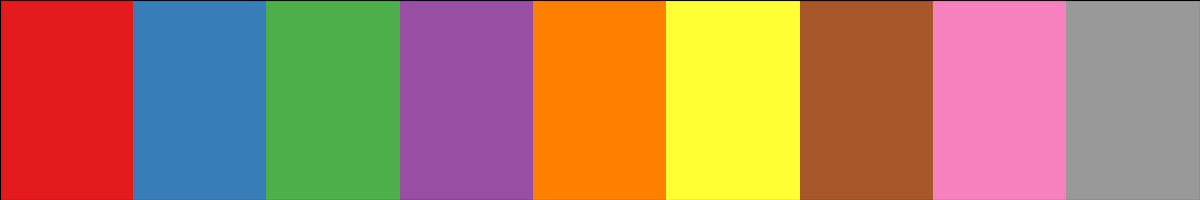

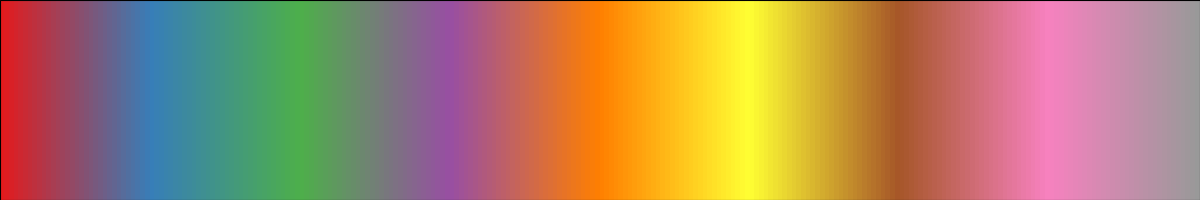

In [76]:
from palettable.colorbrewer.qualitative import Set1_9
Set1_9.show_discrete_image(size=(12,2))
Set1_9.show_continuous_image(size=(12,2))

Now we are going to try something new -- importing functions from a custom-build library.  The link to this file is found on today's webpage.

Import some pre-defined functions from `palette_colors.py` to do some things for us.  Make sure this is saved in your jupyter notebook directory or modify your path.

In [77]:
from sys import path
path.append('library/')
from palette_colors import get_cb_diverging, get_cb_qualitative, get_cb_sequential, grab_names_palettable

ModuleNotFoundError: ignored

These functions will help us explore the different palettable color maps interactively.

Lets pick one of a color palette for diverging colors, sequential, or qualitative (like above with Set1_9).

We'll try diverging first:

In [ ]:
names = grab_names_palettable('Diverging')
ipywidgets.interact(get_cb_diverging, name = names,  number = (3, 15))
plt.show()

Note we are using `ipywidgets.interact` in a slightly different way here - directly as opposed to as a "decorator" like we did before.  For now, just go with it, but if you are curious, then good!  We'll talk about it next week!

Now let's try a sequential colormap:

In [ ]:
names = grab_names_palettable('Sequential')
ipywidgets.interact(get_cb_sequential, name = names,  number = (3, 20))
plt.show()

And finally, qualitative:

In [ ]:
names = grab_names_palettable('Qualitative')
ipywidgets.interact(get_cb_qualitative, name = names,  number = (3, 17)) # does this last # change anything?
plt.show()

# Appling colormaps to real data

Now we'll apply some color maps to actual data in the wild!
* data location for brain scan: http://use.yt/upload/a082bb26 (we probably won't get to this)
* michigan depth map: https://www.ngdc.noaa.gov/mgg/greatlakes/michigan.html (binary float data linked on that page)

In [ ]:
#import h5py # you may have to install this as well
# might not get to the dataset were we use it 
#  however

Let's start with the Michigan dataset:

In [ ]:
# depth in meters
fn1 = "/Users/jnaiman/Downloads/michigan_lld.flt"
michigan = np.fromfile(fn1, dtype='f4').reshape((5365, 4201))
# this reshape is just to go from a 1D array to the 
# correct 2d shape

What does this data look like?

In [ ]:
michigan.shape

Let's take a quick look at a histogram of the michigan data:

In [ ]:
plt.hist(michigan.flat)
plt.show()

So, there looks to be a super weird data point:

In [ ]:
michigan.min()

Lets do an easy cleaning of this data for viz purposes. We'll set this odd point to an `NaN`:

In [ ]:
michigan[michigan == -9999] = np.nan

We can then use special min/max functions to re-calculate these quantities:

In [ ]:
# what are new min & max
np.nanmin(michigan), np.nanmax(michigan)

We can also "mask" out this `NaN` value for plotting purposes:

In [ ]:
# we can replot our histogram as well just to check it out
plt.hist(michigan[~np.isnan(michigan)])
plt.show()
# here the mask is ~ = NOT an NaN

We see that our data is nearly evenly distributed around 0 meters.  Measurements above zero are above the level of the lake, and negative numbers represent depths inside lake Michigan.

### Goal: 
  1. to pick a colormap that shows both the large scale structure and interesting features of this dataset
  1. to pick a colormap that demarkates where the lake and land are

Now that we have a sense of our data, lets do a quick plot.  I'll ask matplotlib to also plot a colorbar so we can map colors to data-values:

In [ ]:
plt.imshow(michigan)
plt.colorbar()
plt.show()

### Question: 

Now that we've had a chance to look at our data a bit, what do we think the values represent?  What does a positive value mean?  Negative value?  Where do we think, spatially, these things will lie?

Lets play around with this default colormap:

In [ ]:
plt.imshow(michigan)
plt.clim(0, 100) # only plot from depths of 0->100
plt.colorbar(extend = 'both') # add little arrow ends
plt.show()

Recall our min&max depth in meters:

 (-275.89, 351.94348)
 
Let's make a symmetric color map about a min/max that encompasses our data min/max, using a *diverging* colormap:

In [ ]:
plt.imshow(michigan, cmap="seismic")
plt.clim(-352, 352) # lets remap over an evenly distributed color map
plt.colorbar()
# note this is an example of a divering colormap

Ok, so we are close to doing what we want here, but boy is it hard to look at!  There are actually some colormaps that are built to highlight different parts of maps like this:

In [ ]:
plt.imshow(michigan, cmap="terrain")
plt.clim(-352, 352)
plt.colorbar()

`terrain` is another diverging colormap, but here we see that the blue/green is probably water (negative height) and the land is highlighted with brown & white.  This follows our "usual" conventions of how we plot differences between land and water.


Now, lets say we want to show a sharp contrast in our color map from the negative to the positive numbers instead of the "smeared" out transition from land to water in the above map.  We can do this by rescaling the colormap with another matplotlib set of functions:

In [ ]:
import matplotlib.colors as colors

# if I haven't already, lets make a bigger pic
plt.rcParams["figure.dpi"] = 200 # or 100

In [ ]:
plt.imshow(michigan, cmap="terrain", norm = colors.SymLogNorm(10))
plt.clim(-352, 352)
plt.colorbar()
plt.show()

If we now look at our image, we see some interesting things.  So, now there is a sharp contrast between negative & positive depths/heights and there is not as much contrast between blue/green or brown/white.

But why?  Let's check out the docs for `SymLogNorm`:

In [ ]:
colors.SymLogNorm?

This is a symmetrical log scale so it logs things both in the negative & positive directions.

Example:

In [ ]:
np.log10([1,10,50]),np.log10(np.abs([-1,-10,-50]))

We see that 1 and 10 are mapped to a jump of 1 but 1->50 is mapped only to a jump of 0.7 instead of 40.

The lake Michigan data is a very high resolution map, so we can zoom in to see some cool details:

In [ ]:
plt.imshow(michigan, cmap="terrain", norm = colors.SymLogNorm(10))
plt.clim(-352, 352)
plt.colorbar()
plt.xlim(2700, 3300)
plt.ylim(3300, 3900)

This shows us one of the rivers that feed into lake Michigan.

And just for fun, here is how it looks with our bad "jet" colormap:

In [ ]:
plt.imshow(michigan, cmap="jet", norm = colors.SymLogNorm(10))
plt.clim(-352, 352)
plt.colorbar()
# ew.

We can use our `ipywidgets` to build up a multiple-widget interface to check out this Michigan dataset that puts all of these things we've explored together:

In [ ]:
# if we haven't already
import ipywidgets

@ipywidgets.interact(colormap = plt.colormaps(),
                     color_range = (1.0, 352.0, 1.0),
                     sym_log=True)

def plot(colormap = 'terrain', color_range = 352, sym_log = True):
    if sym_log:
        norm = colors.SymLogNorm(10)
    else:
        norm = colors.Normalize()
        
    plt.imshow(michigan, cmap=colormap, norm = norm)
    plt.clim(-color_range, color_range)
    plt.colorbar(extend = 'both')